In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv("6 class csv.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [2]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [3]:
df = df.rename(columns={'Temperature (K)':'temp', 'Luminosity(L/Lo)':'lum', 'Radius(R/Ro)':'rad',
       'Absolute magnitude(Mv)':'abs_mag', 'Star type':'type', 'Star color':'color', 'Spectral Class':'spectral_cls'})

In [27]:
spectral_class_to_num = {
    'O': 1, 
    'B': 2,
    'A': 3,
    'F': 4,
    'G': 5,
    'K': 6,
    'M': 7,
}
df['spec_cls_num'] = df['spectral_cls'].map(spectral_class_to_num)

In [5]:
color_mapper = {}
df_color_spec = df[['color', 'spec_cls_num']]
for color in df.color.unique():
    color_df = df_color_spec[df_color_spec['color'] == color]
    top_cls = color_df.value_counts().index[0][1]
    color_mapper[color] = top_cls
    print(f"{color} has max class {color_df.value_counts().index[0][1]}")
color_mapper

Red has max class 7
Blue White has max class 2
White has max class 3
Yellowish White has max class 4
Blue white has max class 3
Pale yellow orange has max class 4
Blue has max class 1
Blue-white has max class 2
Whitish has max class 2
yellow-white has max class 4
Orange has max class 6
White-Yellow has max class 4
white has max class 4
Blue  has max class 2
yellowish has max class 6
Yellowish has max class 6
Orange-Red has max class 6
Blue white  has max class 2
Blue-White has max class 3


{'Red': 7,
 'Blue White': 2,
 'White': 3,
 'Yellowish White': 4,
 'Blue white': 3,
 'Pale yellow orange': 4,
 'Blue': 1,
 'Blue-white': 2,
 'Whitish': 2,
 'yellow-white': 4,
 'Orange': 6,
 'White-Yellow': 4,
 'white': 4,
 'Blue ': 2,
 'yellowish': 6,
 'Yellowish': 6,
 'Orange-Red': 6,
 'Blue white ': 2,
 'Blue-White': 3}

In [26]:
df['color_num'] = df['color'].map(color_mapper)

In [7]:
for col in ['temp', 'lum', 'rad']:
    df['log_'+col] = np.log(df[col])

In [8]:
df.corr()

/tmp/ipykernel_6765/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temp,lum,rad,abs_mag,type,spec_cls_num,color_num,log_temp,log_lum,log_rad
temp,1.000000,0.393404,0.064216,-0.420261,0.411129,-0.817444,-0.812183,0.946420,0.442169,0.212791
lum,0.393404,1.000000,0.526516,-0.692619,0.676845,-0.346568,-0.316082,0.351996,0.730686,0.705692
rad,0.064216,0.526516,1.000000,-0.608728,0.660975,0.060728,0.078269,0.017946,0.547029,0.747379
abs_mag,-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.415359,0.390445,-0.435684,-0.976579,-0.911879
type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.461116,-0.441211,0.470054,0.902005,0.839179
spec_cls_num,-0.817444,-0.346568,0.060728,0.415359,-0.461116,1.000000,0.990565,-0.935765,-0.413427,-0.130855
color_num,-0.812183,-0.316082,0.078269,0.390445,-0.441211,0.990565,1.000000,-0.933816,-0.385532,-0.100475
log_temp,0.946420,0.351996,0.017946,-0.435684,0.470054,-0.935765,-0.933816,1.000000,0.430559,0.163041
log_lum,0.442169,0.730686,0.547029,-0.976579,0.902005,-0.413427,-0.385532,0.430559,1.000000,0.918027
log_rad,0.212791,0.705692,0.747379,-0.911879,0.839179,-0.130855,-0.100475,0.163041,0.918027,1.000000


In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
label_to_str = ['brown dwarf', 'red dwarf', 'white dwarf', 'main seq', 'supergiant', 'hypergiant']
formatter = tic.FuncFormatter(lambda x, pos: label_to_str[int(x)])
def plot_stars(df, size=4.0, x='temp', y='lum', logx=False, logy=False):
    fig, ax = plt.subplots(1,1)
    scatter = ax.scatter(df[x], df[y], c=df.type, s=size)
    handles, labels = scatter.legend_elements(prop='colors', fmt=formatter)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_xscale('log' if logx else 'linear')
    ax.set_yscale('log' if logy else 'linear')
    ax.legend(handles, labels)

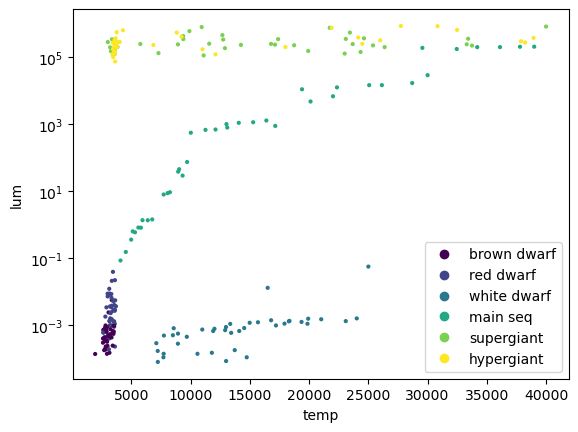

In [18]:
plot_stars(df, logy=True)

Note that supergiants and hypergiants cannot be distinguished easily via the HR diagram

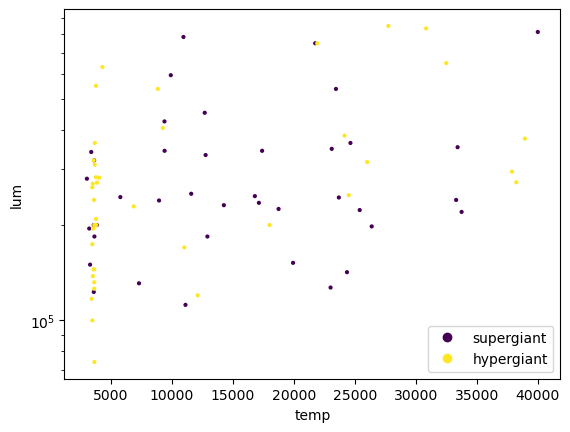

In [19]:
giants_df = df[(df.type == 4) | (df.type == 5)]
plot_stars(giants_df, logy=True)

In [28]:
giants_df.corr()

/tmp/ipykernel_6765/3290544590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  giants_df.corr()


,temp,lum,rad,abs_mag,type,spec_cls_num,color_num,log_temp,log_lum,log_rad
temp,1.000000,0.369917,-0.148475,0.281047,-0.178775,-0.753569,-0.766658,0.955880,0.372291,-0.176273
lum,0.369917,1.000000,0.043243,0.045595,0.020018,-0.323857,-0.324892,0.373839,0.950168,0.033203
rad,-0.148475,0.043243,1.000000,-0.822712,0.964742,0.428390,0.432637,-0.253997,0.029243,0.959270
abs_mag,0.281047,0.045595,-0.822712,1.000000,-0.833716,-0.461132,-0.474931,0.362996,0.084662,-0.809758
type,-0.178775,0.020018,0.964742,-0.833716,1.000000,0.449217,0.454604,-0.276067,-0.018137,0.966274
spec_cls_num,-0.753569,-0.323857,0.428390,-0.461132,0.449217,1.000000,0.993161,-0.896042,-0.337608,0.413271
color_num,-0.766658,-0.324892,0.432637,-0.474931,0.454604,0.993161,1.000000,-0.901088,-0.338735,0.422932
log_temp,0.955880,0.373839,-0.253997,0.362996,-0.276067,-0.896042,-0.901088,1.000000,0.381111,-0.258779
log_lum,0.372291,0.950168,0.029243,0.084662,-0.018137,-0.337608,-0.338735,0.381111,1.000000,0.014116
log_rad,-0.176273,0.033203,0.959270,-0.809758,0.966274,0.413271,0.422932,-0.258779,0.014116,1.000000


It appears that type of giants can be determined easily by radius and this holds true visually
Absolute magnitude appears to be an okay measure as well.

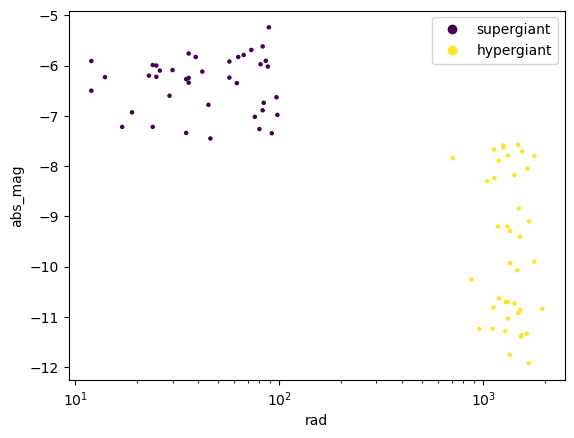

In [21]:
plot_stars(giants_df, size=5.0, x='rad', y='abs_mag', logx=True)

What about dwarves? Absolute Magnitude and radius look useful yet again.
Absolute magnitude provides the best indicator for dwarves.

In [29]:
dwarfs_df = df[(df.type == 0) | (df.type == 1)]
dwarfs_df.corr()

/tmp/ipykernel_6765/13972208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dwarfs_df.corr()


,temp,lum,rad,abs_mag,type,spec_cls_num,color_num,log_temp,log_lum,log_rad
temp,1.000000,0.270587,0.520189,-0.462690,0.431565,NaN,NaN,0.995619,0.454965,0.531883
lum,0.270587,1.000000,0.274193,-0.476442,0.415680,NaN,NaN,0.266920,0.756832,0.354227
rad,0.520189,0.274193,1.000000,-0.641575,0.736568,NaN,NaN,0.503974,0.474661,0.959532
abs_mag,-0.462690,-0.476442,-0.641575,1.000000,-0.887306,NaN,NaN,-0.460072,-0.642475,-0.750043
type,0.431565,0.415680,0.736568,-0.887306,1.000000,NaN,NaN,0.424134,0.664753,0.831610
spec_cls_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_temp,0.995619,0.266920,0.503974,-0.460072,0.424134,NaN,NaN,1.000000,0.456838,0.518362
log_lum,0.454965,0.756832,0.474661,-0.642475,0.664753,NaN,NaN,0.456838,1.000000,0.562315
log_rad,0.531883,0.354227,0.959532,-0.750043,0.831610,NaN,NaN,0.518362,0.562315,1.000000


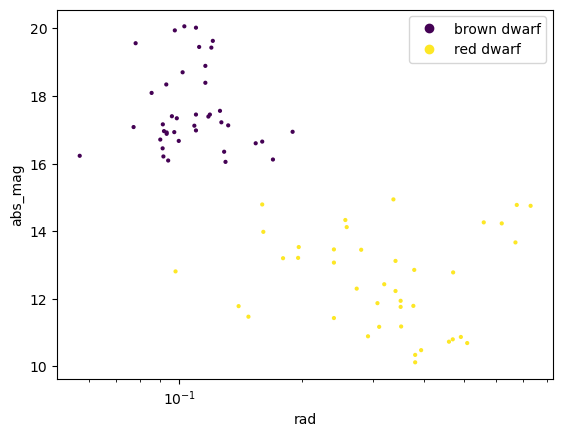

In [23]:
plot_stars(dwarfs_df, x='rad', y='abs_mag', logx=True)

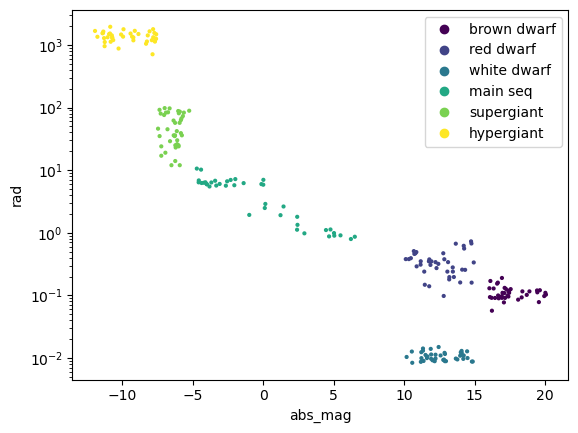

In [24]:
plot_stars(df, x='abs_mag', y='rad', logy=True)

Overall, Absolute Magnitude and Radius combined can differentiate all groups of stars.